## Wstęp do Uczenia Maszynowego

#### Laboratorium 01

### 0\. Sprawy organizacyjne

Kontakt: MS Teams, anna.kozak@pw.edu.pl, katarzyna.woznica@pw.edu.pl

Pracujemy z językiem `Python`.

Pracujemy z repozytorium GitHub: [https://github.com/kozaka93/2025Z-MachineLearning](https://github.com/kozaka93/2025Z-MachineLearning)

Na repozytorium będą się pojawiały pliki `.ipynb` z materiałami na zajęcia.

Rozwiązania prac domowych i projektu będę przesyłane na wskazany adres mail w wyznaczonym terminie.

*Zasady zaliczenia:*

  - 3 x praca domowa (3 x 15p) - raport + kod
  - projekt (35p) - raport + kod + odpowiedź ustna

Aby zaliczyć laboratoria, należy uzyskać ponad 40 punktów ogółem, w tym co najmniej 15 punktów z projektu. Na podstawie punktów jest wystawiana ocena z części laboratoryjnej.

| Ocena | 3 | 3.5 | 4 | 4.5 | 5 |
|:---:|:---:|:---:|:---:|:---:|:---:|
| Punkty | (40, 48] | (48, 56] | (56, 64] | (64, 72] | (72, ∞) |

Z oceną za laboratoria przystępuje się do egzaminu ustnego.

-----

### 1\. Czym będziemy się zajmować?



<img src="tematy.png" alt="drawing" width="800">

W uczeniu maszynowym pracujemy ze zbiorem danych $\mathbf{D}= (X, Y)$.

  - $X$ to **macierz cech** (zmiennych niezależnych) o wymiarze $n \times p$ ($n$ próbek, $p$ cech).
  - $Y$ to **wektor zmiennej docelowej** (etykieta, wynik, który chcemy przewidzieć) o wymiarze $n$.

#### Rodzaje Uczenia Maszynowego

1.  **Uczenie nadzorowane (Supervised Learning):** Jeżeli wartość $Y$ jest znana w zbiorze treningowym (czyli mamy dane wejściowe **i** poprawne odpowiedzi). Chcemy, aby model nauczył się mapowania $X \rightarrow Y$.
      * **Regresja (Regression):** Gdy zmienna $Y$ jest ciągła (np. zarobki, temperatura, cena domu, czyli $Y \in R$).
      * **Klasyfikacja (Classification):** Gdy zmienna $Y$ jest dyskretna (kategorie, klasy, np. tak/nie, kot/pies/mysz, czyli $Y \in \{0, 1, 2, ..\}$). Gdy $Y \in \{0,1\}$ mówimy o klasyfikacji binarnej.
2.  **Uczenie nienadzorowane (Unsupervised Learning):** Jeżeli nie znamy wartości $Y$ (brakuje nam etykiet). Celem jest znalezienie ukrytych wzorców i struktury w samych danych $X$ (np. grupowanie danych w skupienia).

-----

### 2\. Jak wygląda proces uczenia?

Proces uczenia maszynowego polega na stworzeniu **modelu** $\mathbf{M}$, który na podstawie danych wejściowych $X$ potrafi przewidzieć wartość docelową $\hat{Y}$.

**Model:** $\mathbf{M}: D \rightarrow \hat{Y}$

**Prognoza:** $\hat{Y} = M(X)$ .

Model jest "uczony" na danych $D$, aby jak najlepiej minimalizować błąd między przewidywanym $\hat{Y}$ a rzeczywistym $Y$.

-----

### 3\. Etapy uczenia maszynowego

#### 3.1 Pakiety i dane



In [2]:
# Import potrzebnych pakietów (bibliotek)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 'sklearn' (scikit-learn)  biblioteka do uczenia maszynowego w Pythonie.
# Z niej importujemy konkretne algorytmy, np. 'tree' (Drzewa Decyzyjne).
from sklearn import tree

# Będziemy też potrzebować funkcji do podziału danych
from sklearn.model_selection import train_test_split

# Metryka do oceny modelu (np. błęd średniokwadratowy)
from sklearn.metrics import mean_squared_error

Rozważmy zbiór danych zawierający informacje o zarobkach zawodników Baseballu.

In [ ]:
# Zbiory danych można wczytać przez link z GitHub, nie ma koniecznośći ich pobierania.
# index_col =[0] mówi, aby pierwszą kolumnę pliku CSV potraktować jako indeks wierszy.
Hitters = pd.read_csv("", index_col =[0])

-----

#### 3.2 Przygotowanie danych (Pre-processing)

##### *Zadanie 1*

-----

Przygotuj zbiór danych do zbudowania pierwszego modelu.

a) Utwórz zbiór *Hitters\_small* zawierający zmienne o nazwach *Years, Hits, Salary*.

b) Przyjrzyj się utworzonemu zbiorowi danych. Jaki jest wymiar danych, typy zmiennych, czy są braki danych? Jakie rozkłady mają zmienne?

c) Podziel zbiór danych na X = ['Years', 'Hits'] (cechy) i y = ['Salary'] (zmienna docelowa).

d) Podziel dane na zbiór treningowy i testowy (proporcja 50:50).

**Rozwiązanie Zadania 1**

In [ ]:
# a) 


,Years,Hits,Salary
0,1,66,NaN
1,14,81,475.0
2,3,130,480.0
3,11,141,500.0
4,2,87,91.5
...,...,...,...
317,5,127,700.0
318,12,136,875.0
319,6,126,385.0
320,8,144,960.0


Wymiar danych (wiersze x kolumny): (322, 3)
<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, 0 to 321
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Years   322 non-null    int64  
 1   Hits    322 non-null    int64  
 2   Salary  263 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 10.1 KB


array([[<Axes: title={'center': 'Years'}>,
        <Axes: title={'center': 'Hits'}>],
       [<Axes: title={'center': 'Salary'}>, <Axes: >]], dtype=object)

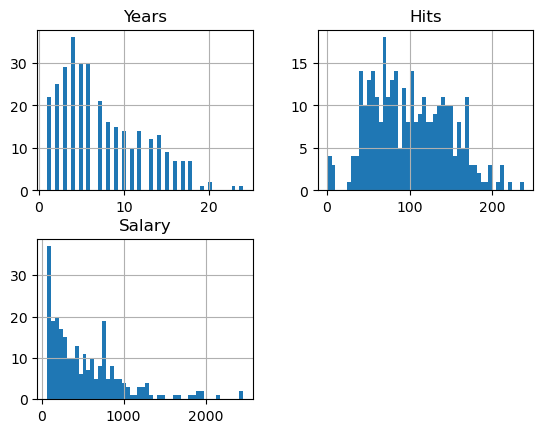

In [ ]:
# b) 

In [ ]:
# c) 

c:\Users\AnnA\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([[<Axes: title={'center': 'Var1'}>,
        <Axes: title={'center': 'Var2'}>],
       [<Axes: title={'center': 'log(Var1)'}>,
        <Axes: title={'center': 'log(Var2)'}>]], dtype=object)

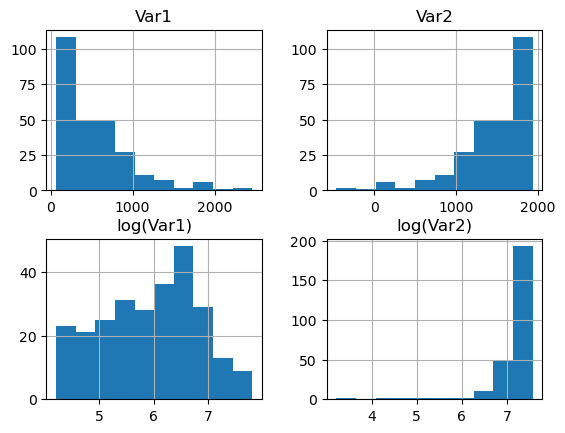

In [19]:
## Eksperyment - transformacja log zmiennych skośnych

experiment = pd.DataFrame({"Var1" : Hitters.Salary,
                           "Var2": (-Hitters.Salary) + 2000})

experiment["log(Var1)"] = np.log(experiment.Var1)
experiment["log(Var2)"] = np.log(experiment.Var2)

experiment.hist()

In [ ]:
# d) 

#### 3.3 Podstawy drzew decyzyjnych 

#### *Jak się buduje drzewa dla zadania regresji?*
1. Dzielimy przestrzeń $X = (X_1, X_2, \dots, X_p)$ na $J$ regionów $R_1, R_2, \dots, R_J$.
2. Predykcja w $j$-ty regionie jest równa średniej z wartości obserwacji $y$ zbioru treningowego w regione $R_J$. 

In [ ]:
# Tworzymy obiekt klasy DecisionTreeRegressor.
# Drzewo będzie miało domyślne parametry.
Tree = tree.DecisionTreeRegressor()

# Trening (uczenie) modelu: Używamy metody .fit(), aby nauczyć model na danych treningowych.
Tree.fit()

DecisionTreeRegressor()

Wizualizacja drzewa decyzyjnego

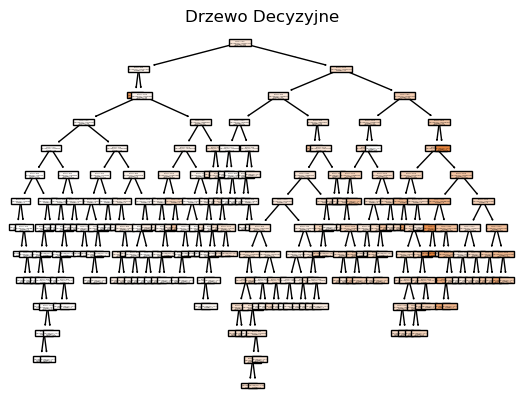

In [22]:
tree.plot_tree(Tree,
               feature_names=X.columns.tolist(), # Nazwy kolumn cech
               filled=True # Wypełnienie węzłów kolorem
               ) 
plt.title("Drzewo Decyzyjne")
plt.show()

Przejrzysty zapis otrzymanego drzewa

In [13]:
from sklearn.tree import export_text
t = export_text(Tree)
print(t)

|--- feature_0 <= 5.50
|   |--- feature_1 <= 20.50
|   |   |--- value: [2127.33]
|   |--- feature_1 >  20.50
|   |   |--- feature_1 <= 113.50
|   |   |   |--- feature_0 <= 3.50
|   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |--- feature_1 <= 80.00
|   |   |   |   |   |   |--- feature_1 <= 47.00
|   |   |   |   |   |   |   |--- value: [95.00]
|   |   |   |   |   |   |--- feature_1 >  47.00
|   |   |   |   |   |   |   |--- feature_1 <= 54.50
|   |   |   |   |   |   |   |   |--- value: [70.00]
|   |   |   |   |   |   |   |--- feature_1 >  54.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 67.00
|   |   |   |   |   |   |   |   |   |--- value: [90.00]
|   |   |   |   |   |   |   |   |--- feature_1 >  67.00
|   |   |   |   |   |   |   |   |   |--- value: [70.00]
|   |   |   |   |   |--- feature_1 >  80.00
|   |   |   |   |   |   |--- feature_1 <= 111.00
|   |   |   |   |   |   |   |--- feature_1 <= 106.00
|   |   |   |   |   |   |   |   |--- feature_1 <= 86.50
|   |   |   | 

**Drzewo o trzech liściach**

Poprzez wskazywanie hiperparametrów możemy manipulować skompliowaniem i jakością modelu drzewa. Zbudujmy drzewo o hiperparametrze `max_leaf_nodes` = 3.

[Text(0.4, 0.8333333333333334, 'Years <= 5.5\nsquared_error = 240041.113\nsamples = 131\nvalue = 561.658'),
 Text(0.2, 0.5, 'squared_error = 101971.574\nsamples = 59\nvalue = 286.429'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'Hits <= 116.0\nsquared_error = 240242.176\nsamples = 72\nvalue = 787.192'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'squared_error = 65683.11\nsamples = 32\nvalue = 518.125'),
 Text(0.8, 0.16666666666666666, 'squared_error = 275637.503\nsamples = 40\nvalue = 1002.446')]

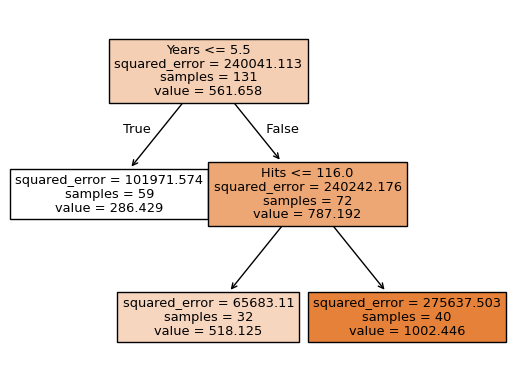

In [ ]:
Tree3 = tree.DecisionTreeRegressor()
Tree3 = Tree3.fit()

tree.plot_tree(Tree3, 
               feature_names=Tree3.feature_names_in_.tolist(),
               filled=True)

#### 3.4 Jak dobry jest nasz model (zadanie regresji)?

Błąd średniokwadratowy:

$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{f}(x_i))^2$,

gdzie:

$y_i$ - wartość prawdziwa dla $i$-tej obserwacji,

$\hat{f}(x_i)$ jest predykcją modelu dla $i$-tej obserwacji.

In [ ]:
# Generowanie prognoz (Prediction)
# Używamy wytrenowanych modeli do przewidywania wartości 'Salary' na nieznanych danych (X_test).


# Obliczanie Błędu Średniokwadratowego (Mean Squared Error - MSE)



MSE dla Tree: 231492.81
MSE dla Tree3 (max_depth=3): 118732.01


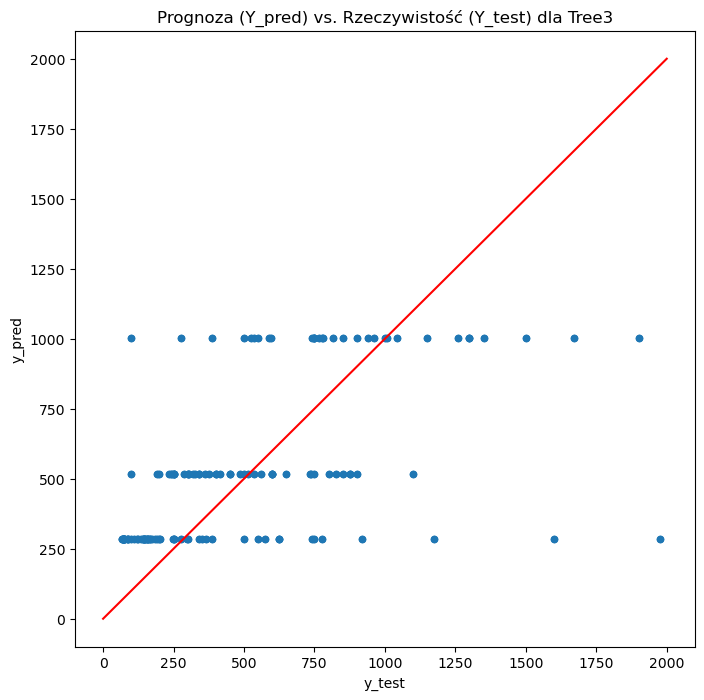